## Übung Principal Component Analysis
---

### MNIST Datenset

- Laden Sie (analog zur letzten Vorlesung) das MNIST Datenset ein (erste 60.000 Training Set, letzte 10.000 Test Set).




In [1]:
import numpy as np
from sklearn.datasets import fetch_mldata
from time import time
from sklearn import linear_model

mnist = fetch_mldata('MNIST original')
X,y = mnist['data'], mnist['target']
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
X.shape

(70000, 784)

- Führen Sie eine PCA mit dem Training Set durch durch (mit 95% erklärter Varianz)

In [4]:
# PCA durchführen
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

################
# Your Code here
################
pca = PCA(n_components=0.90)
pca.fit(X_test)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

- Plotten Sie dann die Daten des Test Sets entlang ersten beiden Principal Components $\vec{c}_1$ und $\vec{c}_2$ 

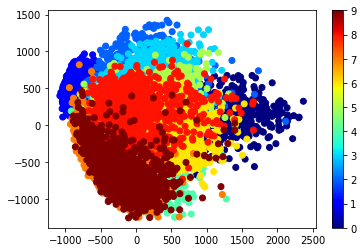

In [5]:
X_test_d = pca.transform(X_test)
plt.scatter(X_test_d[:,0],X_test_d[:,1],c=y_test,cmap="jet")
plt.colorbar()

In [11]:
np.sum(pca.explained_variance_ratio_)

0.9007162430339677

Wenden Sie nochmals die Softmax-Regression auf MNIST-Test-Set an:
- Messen Sie die benötigte Zeit für das Training
- Berechnen Sie die Accurcy des Test Sets

In [12]:
# Softmax-Regression auf MNIST-Test-Set
cf = linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs')

t0 = time()
cf.fit(X_train,y_train)
t1 = time()-t0
print(t1)

# Accuray berechnen
print(cf.score(X_test,y_test))

25.05669593811035
0.9255


Trainieren Sie nun einen Softmax-Klassifikator mittels der mit PCA dimensionalitätsreduzierten 
Daten:

- Messen Sie wiederum die Zeit für das Traing
- Berechnen Sie die Accuracy des Test Sets
- Vergleichen Sie mit oben

In [13]:
cf2 = linear_model.LogisticRegression(multi_class="multinomial", solver="lbfgs")
X_train_d = pca.transform(X_train)
t0 = time()
cf2.fit(X_train_d,y_train)
t1 = time()-t0
print(t1)

10.865320682525635


In [14]:
X_test_d = pca.transform(X_test)
cf2.score(X_test_d,y_test)

0.9133

Das Training benötigt nur noch ein Viertel der Zeit bei einer ganz leichten Einbuße bezügliche Accuracy.

### Gesichtserkennung via Eigenfaces

Eine Anwendung von PCA ist die Gesichterkennung via sogenannten **Eigenfaces** (=Principal 
Components im Bildraum). Die Originalarbeit vom MIT finden Sie hier:

https://www.cs.ucsb.edu/~mturk/Papers/jcn.pdf

Die grundlegende Idee ist wie folgt:
- Führe an einem Training Set $\left(\mathbf{X}_{\mathrm{train}},\vec{y}_{\mathrm{train}}\right)$ von Bildern eine PCA durch, d.h. erhalte die reduzierte Darstellung $\left(\mathbf{X}_{\mathrm{train},d},\vec{y}_{\mathrm{train}}\right)$
- Für ein unbekanntes Bild $(\vec{x}_{\mathrm{test}},y_{\mathrm{test}})$ aus dem Testest $\left(\mathbf{X}_{\mathrm{test}},\vec{y}_{\mathrm{test}}\right)$ wird dieses Bild via PCA in den gleichen Unterraum wie das Training Set projeziert (d.h. man erhält $(\vec{x}_{\mathrm{test,d}},y_{\mathrm{test}})$ und dort der minimale 
euklidsche Abstand 
$$
\min_{i} \left|\vec{x}_{\mathrm{test,d}}-\vec{x}_{\mathrm{train,d}}^{(i)}\right|^2 
$$
bestimmt.

In [16]:
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

# Laden der Bilddaten
lfw_people = fetch_lfw_people(min_faces_per_person=60, resize=0.5)
X = lfw_people.data
y = lfw_people.target
#y = y.reshape(1348,1)
print(y.shape)
# Abmessung width(w) und height(h) der Bilder auslesen
n_samples, h, w = lfw_people.images.shape

# Splitten in Training Set und Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
#np.savetxt('X.dat',X)
#np.savetxt('y.dat',y)


(1348,)


### Alternativ einlesen 

In [1]:
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split


X = np.loadtxt('X.dat')
y = np.loadtxt('y.dat')

n_samples, h, w = (1348, 62, 47)

# Splitten in Training Set und Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


(1011, 2914)


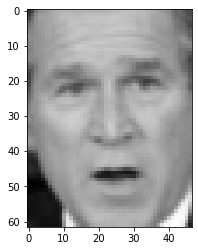

In [19]:
# Plotten eines Bildes
import matplotlib.pyplot as plt
print(X_train.shape)
plt.imshow(X_train[1000,:].reshape(h,w),cmap=plt.cm.gray)

0.9668995654872513


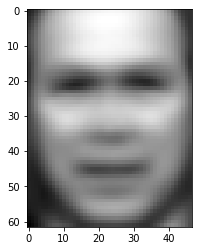

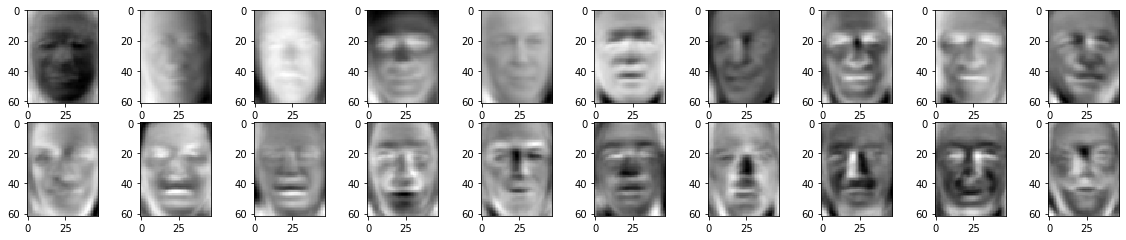

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA mit Training Set durchführen
d=200
pca = PCA(n_components=d)
X_train_d = pca.fit_transform(X_train)
print(np.sum(pca.explained_variance_ratio_))

# Plotten des Average Faces
plt.imshow(pca.mean_.reshape(h,w),cmap=plt.cm.gray)
plt.show()
# Plotten der ersten 20 Eigenfaces
plt.figure(figsize=(20,10))
for k in range(20):
    plt.subplot(5, 10 , k + 1) 
    plt.imshow(pca.components_[k,:].reshape(h,w), cmap=plt.cm.gray)

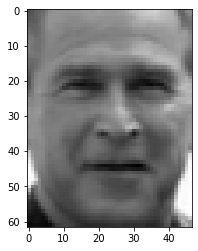

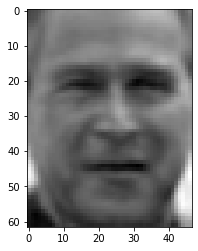

In [4]:
# Plotten des durch PCA komprimierten Bildes
X_rec = pca.inverse_transform(X_train_d)

plt.imshow(X_train[200,:].reshape(h,w),cmap=plt.cm.gray)
plt.show()
plt.imshow(X_rec[200,:].reshape(h,w),cmap=plt.cm.gray)
plt.show()

In [5]:
# Face Recognition durchführen für ein Bild

# Unbekanntes/neues Bild einlesen ...
t = 10
X_fr = np.reshape(X_test[t,:],(1,h*w))
print(y_test[t])

# ... transformieren auf die Achsen c_1, ..., c_d
X_fr_d = pca.transform(X_fr)

print(X_fr_d.shape)
# Minimalen Abstand berechnen --> Bestimmung der Klasse
l = np.argmin(np.sum((X_train_d-X_fr_d)**2,axis=1))
print(l)
print(y_train[l])

2.0
(1, 200)
975
2.0
